In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile
import cv2

#Metadata

In [28]:
df = pd.read_csv("/content/drive/MyDrive/global-ai-hub-bootcamp/UrbanSound8K/metadata/UrbanSound8K.csv")

In [29]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [31]:
del df["fsID"]
del df["start"]
del df["end"]
del df["salience"]
df.head()

,slice_file_name,fold,classID,class
0,100032-3-0-0.wav,5,3,dog_bark
1,100263-2-0-117.wav,5,2,children_playing
2,100263-2-0-121.wav,5,2,children_playing
3,100263-2-0-126.wav,5,2,children_playing
4,100263-2-0-137.wav,5,2,children_playing


In [36]:
specnames = []
classes = []
for index, row in df.iterrows():
  specname = row["slice_file_name"].split(".")[0]+".png"
  specnames.append(specname)

df["spec_file_name"] = specnames
df.head()

,slice_file_name,fold,classID,class,spec_file_name
0,100032-3-0-0.wav,5,3,dog_bark,100032-3-0-0.png
1,100263-2-0-117.wav,5,2,children_playing,100263-2-0-117.png
2,100263-2-0-121.wav,5,2,children_playing,100263-2-0-121.png
3,100263-2-0-126.wav,5,2,children_playing,100263-2-0-126.png
4,100263-2-0-137.wav,5,2,children_playing,100263-2-0-137.png


In [41]:
new_filenames = []
for index, row in df.iterrows():
  x = "/content/spectograms/"+str(row["classID"])+"/"+row["spec_file_name"]
  new_filenames.append(x)
df["filename"] = new_filenames

In [42]:
df.head()

,slice_file_name,fold,classID,class,spec_file_name,filename
0,100032-3-0-0.wav,5,3,dog_bark,100032-3-0-0.png,/content/spectograms/3/100032-3-0-0.png
1,100263-2-0-117.wav,5,2,children_playing,100263-2-0-117.png,/content/spectograms/2/100263-2-0-117.png
2,100263-2-0-121.wav,5,2,children_playing,100263-2-0-121.png,/content/spectograms/2/100263-2-0-121.png
3,100263-2-0-126.wav,5,2,children_playing,100263-2-0-126.png,/content/spectograms/2/100263-2-0-126.png
4,100263-2-0-137.wav,5,2,children_playing,100263-2-0-137.png,/content/spectograms/2/100263-2-0-137.png


In [43]:
del df["slice_file_name"],df["class"], df["spec_file_name"]
df.head()	

,fold,classID,filename
0,5,3,/content/spectograms/3/100032-3-0-0.png
1,5,2,/content/spectograms/2/100263-2-0-117.png
2,5,2,/content/spectograms/2/100263-2-0-121.png
3,5,2,/content/spectograms/2/100263-2-0-126.png
4,5,2,/content/spectograms/2/100263-2-0-137.png


In [44]:
df.to_csv("/content/drive/MyDrive/global-ai-hub-bootcamp/cleaned_metadata.csv")

#Converting Grayscale and Resizing Images

In [45]:
df.head()

,fold,classID,filename
0,5,3,/content/spectograms/3/100032-3-0-0.png
1,5,2,/content/spectograms/2/100263-2-0-117.png
2,5,2,/content/spectograms/2/100263-2-0-121.png
3,5,2,/content/spectograms/2/100263-2-0-126.png
4,5,2,/content/spectograms/2/100263-2-0-137.png


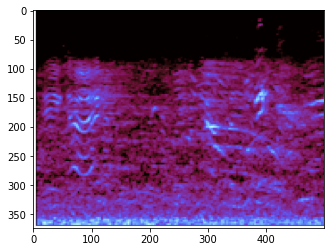

In [47]:
# Let's see a sample before preprocessing steps to observe changes
im = cv2.imread("/content/spectograms/2/100263-2-0-117.png")
plt.imshow(im)

In [50]:
for index, row in df.iterrows():
  if index%500 == 0:
    print(f"{index} samples have been preprocessed.")
  filename = row["filename"]
  im = cv2.imread(filename)                   # reading image
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # converting bgr to grayscale
  resized = cv2.resize(gray, (512,512))       # resizing grayscale image. I choose as 512x512 considering the NN architecture that I'll use later.
  cv2.imwrite(filename, resized)              # overwriting preprocessed image

0 samples have been preprocessed.
500 samples have been preprocessed.
1000 samples have been preprocessed.
1500 samples have been preprocessed.
2000 samples have been preprocessed.
2500 samples have been preprocessed.
3000 samples have been preprocessed.
3500 samples have been preprocessed.
4000 samples have been preprocessed.
4500 samples have been preprocessed.
5000 samples have been preprocessed.
5500 samples have been preprocessed.
6000 samples have been preprocessed.
6500 samples have been preprocessed.
7000 samples have been preprocessed.
7500 samples have been preprocessed.
8000 samples have been preprocessed.
8500 samples have been preprocessed.


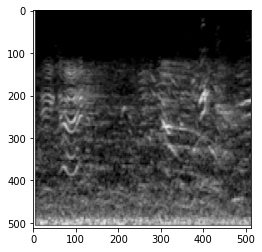

In [49]:
# Let's see the same sample after preprocessing steps
im = cv2.imread("/content/spectograms/2/100263-2-0-117.png")
plt.imshow(im)

In [51]:
# Final step. Zipping preprocessed spectograms and saving to Drive.
!zip -r /content/drive/MyDrive/global-ai-hub-bootcamp/preprocessed_spectograms.zip /content/spectograms

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  adding: content/spectograms/4/156362-4-0-2.png (deflated 6%)
  adding: content/spectograms/4/130961-4-4-0.png (deflated 6%)
  adding: content/spectograms/4/169466-4-1-8.png (deflated 6%)
  adding: content/spectograms/4/34643-4-2-0.png (deflated 7%)
  adding: content/spectograms/4/76085-4-0-89.png (deflated 6%)
  adding: content/spectograms/4/29721-4-0-13.png (deflated 5%)
  adding: content/spectograms/4/205874-4-9-0.png (deflated 11%)
  adding: content/spectograms/4/180029-4-2-0.png (deflated 8%)
  adding: content/spectograms/4/180126-4-2-0.png (deflated 9%)
  adding: content/spectograms/4/180128-4-16-1.png (deflated 6%)
  adding: content/spectograms/4/29722-4-0-2.png (deflated 5%)
  adding: content/spectograms/4/144351-4-3-2.png (deflated 6%)
  adding: content/spectograms/4/34621-4-0-0.png (deflated 15%)
  adding: content/spectograms/4/180029-4-1-0.png (deflated 7%)
  adding: content/spectograms/4/166931-4-2-8.png (deflated 6%)
  adding